# 함수형 API
- DNN

In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
import keras
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import seaborn as sns
from numpy import array
from numpy import hstack
from sklearn.metrics import mean_squared_error, explained_variance_score
from keras.callbacks import EarlyStopping
from matplotlib import font_manager, rc
from keras.models import Model
from keras import layers
from keras import Input
import keras
import math

# 다변량
def split_mult_data(data, timestep, lag):
    x, y = [], []
    for i in range(len(data)):
        end_ix = i + timestep
        out_end_ix = end_ix + lag
        if out_end_ix > len(data):
            break;
        seq_x, seq_y = data[i:end_ix, :], data[end_ix:out_end_ix, -1]
        x.append(seq_x)
        y.append(seq_y)
    return array(x), array(y)

# 단일
def split_data(data, timestep):
    x, y = [], []
    for i in range(len(data)):
        end_ix = i + timestep
        if end_ix > len(data)-1:
            break
        seq_x, seq_y = data[i:end_ix], data[end_ix]
        x.append(seq_x)
        y.append(seq_y)
    return array(x), array(y)

# 데이터 분할 함수 : 6.2.2
def split(data_x, data_y):
    train_size = int(len(data_x)*0.6)
    val_size = int(len(data_x)*0.8)
    
    data_train_x = data_x[:train_size]
    data_val_x = data_x[train_size:val_size]
    data_test_x = data_x[val_size:]
    
    data_train_y = data_y[:train_size]
    data_val_y = data_y[train_size:val_size]
    data_test_y = data_y[val_size:] 
    
    return data_train_x, data_val_x, data_test_x, data_train_y, data_val_y, data_test_y

# 분할 데이터 정규화
def normalization(data_train, data_val, data_test):
    scaler = MinMaxScaler() #StandardScaler
    scaler.fit(data_train)
    n_data_train = scaler.transform(data_train)
    n_data_val = scaler.transform(data_val)
    n_data_test = scaler.transform(data_test)
    return n_data_train, n_data_val, n_data_test

# 분할 데이터 정규화
def normalization2(data_train, data_test):
    scaler = MinMaxScaler() #StandardScaler
    scaler.fit(data_train)
    n_data_train = scaler.transform(data_train)
    n_data_test = scaler.transform(data_test)
    return n_data_train, n_data_test

# 전체 데이터 정규화
def normalization_all(data):
    scaler = MinMaxScaler() #StandardScaler
    scaler.fit(data)
    n_data = scaler.transform(data)
    return n_data

# minmax정규화
def minmax(x):
    n_max = np.max(x)
    n_min = np.min(x)
    sc = (x - n_min) / (n_max - n_min)
    return sc

# 데이터 불러오기

In [14]:
# 코로나 데이터
covid19 = pd.read_csv("covid19.csv",  header=0, squeeze=True)
covid19 = covid19[{'decide_per_day' : '확진자', 'recovered_per_day' : '완치자'}]
covid19.columns = ['확진자', '완치자']
covid19

,확진자,완치자
0,1,0
1,0,0
2,0,0
3,0,0
4,1,0
...,...,...
488,585,849
489,538,546
490,516,566
491,699,589


In [4]:
# 뉴스 데이터 
news = pd.read_csv('사회적거리두기 뉴스.csv')
# news.drop(['Unnamed: 0'], axis='columns', inplace=True)
news

,날짜,뉴스 수
0,2020-01-20,0
1,2020-01-21,0
2,2020-01-22,0
3,2020-01-23,0
4,2020-01-24,0
...,...,...
430,2021-03-25,1
431,2021-03-26,17
432,2021-03-27,3
433,2021-03-28,13


In [5]:
# 코로나 관련 검색어
search_covid19 = pd.read_csv("5인이상_검색어.csv")
search_covid19

,날짜,5인이상
0,2020-01-20,0.00000
1,2020-01-21,0.00000
2,2020-01-22,0.00000
3,2020-01-23,0.00000
4,2020-01-24,0.00000
...,...,...
430,2021-03-25,5.46614
431,2021-03-26,7.22695
432,2021-03-27,4.22074
433,2021-03-28,3.72146


In [6]:
# 인구이동 _ 저장한 csv 불러오기
local_people_df = pd.read_csv('seoul_people.csv')
local_people_df.columns = ['날짜', '인구이동']

local_people_df

,날짜,인구이동
0,2020-01-20,263707987
1,2020-01-21,263999557
2,2020-01-22,263092698
3,2020-01-23,255740975
4,2020-01-24,230503552
...,...,...
430,2021-03-25,253723156
431,2021-03-26,253132397
432,2021-03-27,245764635
433,2021-03-28,244437877


# 6:2:2 분할

In [13]:
timestep = 14
lag = 1

news_data = news['뉴스 수'].values

news_x, news_y = split_data(news_data, timestep)

for i in range(40,50):
    print('news_x : ',news_x[i], 'news_y : ', news_y[i])
    
print('뉴스 : ', news_x.shape)

news_train_x, news_val_x, news_test_x, news_train_y, news_val_y, news_test_y = split(news_x, news_y)
print(len(news_train_x), len(news_val_x), len(news_test_x), len(news_train_y), len(news_val_x), len(news_test_y), news_train_x.shape)
#----------------------------------------------------------
search_data = search_covid19['코로나'].values

search_x, search_y = split_data(search_data, timestep)

for i in range(10):
    print('search_x : ',search_x[i], 'search_y : ', search_y[i])
    
print('네이버 검색어 전 : ', search_x.shape)

## LSTM = 1d CNN경우 ###
# reshape from [samples, timesteps] into [samples, timesteps, features]
search_features = 1
search_x = search_x.reshape((search_x.shape[0], search_x.shape[1], search_features))
print('네이버 검색어 후 : ', search_x.shape)

search_train_x, search_val_x, search_test_x, search_train_y, search_val_y, search_test_y = split(search_x, search_y)
print(len(search_train_x), len(search_val_x), len(search_test_x), len(search_train_y), len(search_val_x), len(search_test_y), search_train_x.shape)
#-----------------------------------------------------------
covid19_data = covid19.values

covid_x, covid_y = split_mult_data(covid19_data, timestep, lag)

for i in range(424,len(covid_x)):
    print('covid_x : ',covid_x[i], 'covid_y : ', covid_y[i])

print('코로나 : ', covid_x.shape)

covid_train_x, covid_val_x, covid_test_x, covid_train_y, covid_val_y, covid_test_y = split(covid_x, covid_y)
print(len(covid_train_x), len(covid_val_x), len(covid_test_x), len(covid_train_y), len(covid_val_x), len(covid_test_y), covid_train_x.shape)
#--------------------------------------------------------------
people_data = local_people_df['총 인구 이동'].values

people_x, people_y = split_data(people_data, timestep)

for i in range(40,50):
    print('people_x : ',people_x[i], 'people_y : ', people_y[i])
    
print('총 인구 이동 : ', people_x.shape)

people_train_x, people_val_x, people_test_x, people_train_y, people_val_y, people_test_y = split(people_x, people_y)
print(len(people_train_x), len(people_val_x), len(people_test_x), len(people_train_y), len(people_val_x), len(people_test_y), people_train_x.shape)

news_x :  [ 5  4 15 14 25 21 23  5 11 33 18 18 20 28] news_y :  9
news_x :  [ 4 15 14 25 21 23  5 11 33 18 18 20 28  9] news_y :  14
news_x :  [15 14 25 21 23  5 11 33 18 18 20 28  9 14] news_y :  35
news_x :  [14 25 21 23  5 11 33 18 18 20 28  9 14 35] news_y :  38
news_x :  [25 21 23  5 11 33 18 18 20 28  9 14 35 38] news_y :  24
news_x :  [21 23  5 11 33 18 18 20 28  9 14 35 38 24] news_y :  24
news_x :  [23  5 11 33 18 18 20 28  9 14 35 38 24 24] news_y :  17
news_x :  [ 5 11 33 18 18 20 28  9 14 35 38 24 24 17] news_y :  27
news_x :  [11 33 18 18 20 28  9 14 35 38 24 24 17 27] news_y :  38
news_x :  [33 18 18 20 28  9 14 35 38 24 24 17 27 38] news_y :  131
뉴스 :  (421, 14)
252 84 85 252 84 85 (252, 14)


KeyError: '코로나'

# 정규화

In [184]:
n_covid_train_x = covid_train_x.reshape(covid_train_x.shape[0], covid_train_x.shape[1]*covid_train_x.shape[2])

n_covid_val_x = covid_val_x.reshape(covid_val_x.shape[0], covid_train_x.shape[1]*covid_val_x.shape[2])
n_covid_test_x = covid_test_x.reshape(covid_test_x.shape[0], covid_train_x.shape[1]*covid_test_x.shape[2])

print('정규화를 위해 코로나 데이터 형태 변환 : ', n_covid_train_x.shape)

# 데이터 정규화
covid_train_x, covid_val_x, covid_test_x = normalization(n_covid_train_x, n_covid_val_x, n_covid_test_x)
news_train_x, news_val_x, news_test_x = normalization(news_train_x, news_val_x, news_test_x)
people_train_x, people_val_x, people_test_x = normalization(people_train_x, people_val_x, people_test_x)

print('코로나 데이터 형태 : ' ,covid_train_x.shape)
print('뉴스 데이터 형태 : ' ,news_train_x.shape)
print('검색어 데이터 형태 : ' ,search_train_x.shape)
print('인구 이동 데이터 형태 : ' ,people_train_x.shape)

## LSTM = 1d CNN ###
# 형태 복원(LSTM에 맞게) - 코로나 데이터
covid_train_x = covid_train_x.reshape(covid_train_x.shape[0], covid_x.shape[1], covid_x.shape[2])
covid_val_x = covid_val_x.reshape(covid_val_x.shape[0], covid_x.shape[1], covid_x.shape[2])
covid_test_x = covid_test_x.reshape(covid_test_x.shape[0], covid_x.shape[1], covid_x.shape[2])

print('코로나 데이터 형태 변환한거 원상복귀 : ', covid_train_x.shape)

# 형태 변형시켜줌(1d CNN에 맞게) - 뉴스 데이터
news_features = 1
news_train_x = news_train_x.reshape((news_train_x.shape[0], news_train_x.shape[1], news_features))
news_val_x = news_val_x.reshape((news_val_x.shape[0], news_val_x.shape[1], news_features))
news_test_x = news_test_x.reshape((news_test_x.shape[0], news_test_x.shape[1], news_features))

print('뉴스 데이터 형태 변환 : ' ,news_train_x.shape)

# 형태 변형시켜줌(1d CNN에 맞게) - 인구 데이터
people_features = 1
people_train_x = people_train_x.reshape((people_train_x.shape[0], people_train_x.shape[1], people_features))
people_val_x = people_val_x.reshape((people_val_x.shape[0], people_val_x.shape[1], people_features))
people_test_x = people_test_x.reshape((people_test_x.shape[0], people_test_x.shape[1], people_features))

print('인구 데이터 형태 변환 : ', people_train_x.shape)

정규화를 위해 코로나 데이터 형태 변환 :  (252, 42)
코로나 데이터 형태 :  (252, 42)
뉴스 데이터 형태 :  (252, 14)
검색어 데이터 형태 :  (252, 14, 1)
인구 이동 데이터 형태 :  (252, 14)
코로나 데이터 형태 변환한거 원상복귀 :  (252, 14, 3)
뉴스 데이터 형태 변환 :  (252, 14, 1)
인구 데이터 형태 변환 :  (252, 14, 1)


# 모델 생성

In [2]:
from keras.models import Model
from keras import layers
from keras import Input
import keras
import tensorflow as tf

if covid_train_x.shape[1] >= 2:
    n = 2
    p = 1
else :
    n = 1
    p = 1
    
tf.random.set_seed(555)

# Input
input_covid = Input(shape=(covid_train_x.shape[1],covid_train_x.shape[2]), dtype='float32') # 코로나
hidden1_covid = layers.Conv1D(filters=64, kernel_size=n, activation='relu')(input_covid)
hidden2_covid = layers.MaxPooling1D(pool_size=p)(hidden1_covid)
hidden3_covid = layers.Flatten()(hidden2_covid)

input_news = Input(shape=(news_train_x.shape[1],news_train_x.shape[2]), dtype='float32')
hidden1_news = layers.Conv1D(filters=64, kernel_size=n, activation='relu')(input_news)
hidden2_news = layers.MaxPooling1D(pool_size=p)(hidden1_news)
hidden3_news = layers.Flatten()(hidden2_news)

input_search = Input(shape=(search_train_x.shape[1],search_train_x.shape[2]), dtype='float32')
hidden1_search = layers.Conv1D(filters=64, kernel_size=n, activation='relu')(input_search)
hidden2_search = layers.MaxPooling1D(pool_size=p)(hidden1_search)
hidden3_search = layers.Flatten()(hidden2_search)

input_people = Input(shape=(people_train_x.shape[1],people_train_x.shape[2]), dtype='float32')
hidden1_people = layers.Conv1D(filters=64, kernel_size=n, activation='relu')(input_people)
hidden2_people = layers.MaxPooling1D(pool_size=p)(hidden1_people)
hidden3_people = layers.Flatten()(hidden2_people)

# 연결
concatenated = layers.concatenate([hidden3_covid, hidden3_news, hidden3_search, hidden3_people]) ####
# Output
result = layers.Dense(lag)(concatenated)

model = Model([ input_covid, input_news, input_search, input_people], result) ####
model.compile(optimizer='adam', loss=['mse'], metrics=['mae'])

callback_list = [
  keras.callbacks.EarlyStopping(
    monitor='val_loss', # 모델의 검증 정확도 모니터링
    patience=20, # 1 에포크보다 더 길게 향상되지 않으면 중단
  )
]
# batch_size : batch_size만큼 보고 가중치를 업데이트 주겠다
hist = model.fit([covid_train_x, news_train_x, search_train_x, people_train_x], covid_train_y, epochs=1000, batch_size=5,
                 callbacks=callback_list, validation_data=([covid_val_x, news_val_x, search_val_x, people_val_x], covid_val_y)) ####

NameError: name 'covid_train_x' is not defined

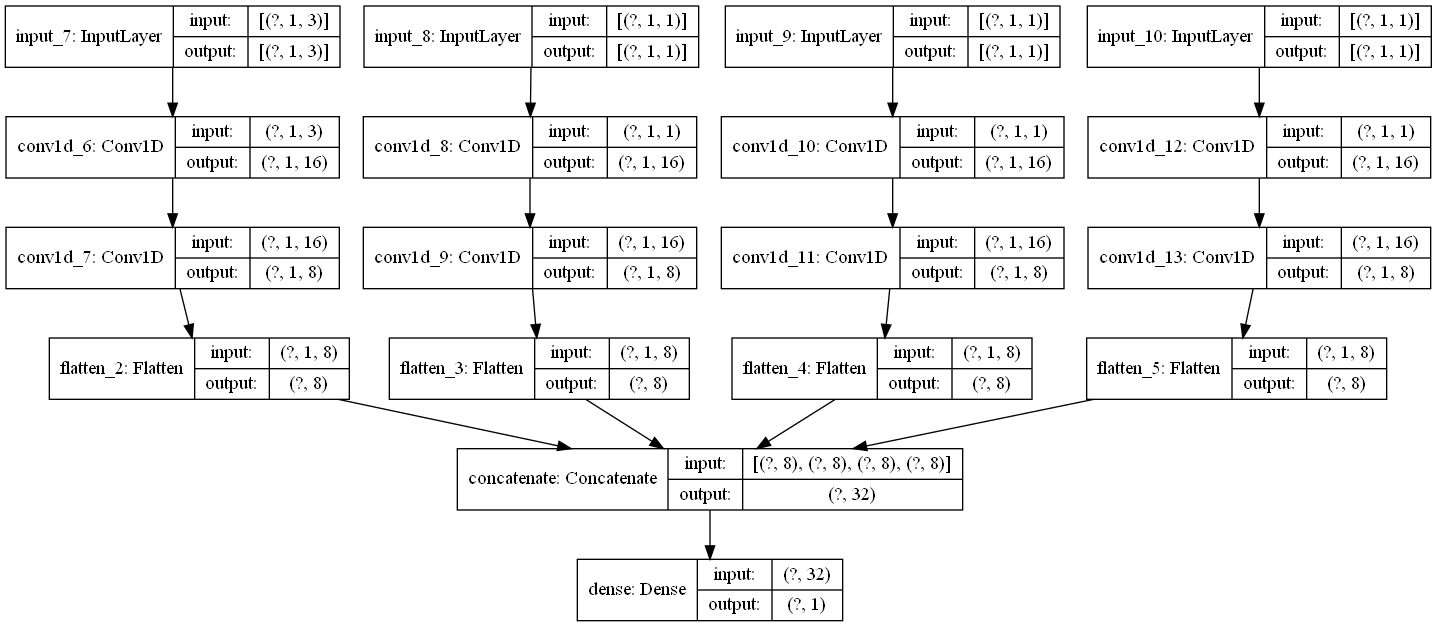

In [12]:
from keras.utils import plot_model
plot_model(model, to_file='model_20210124.png', show_shapes=True)

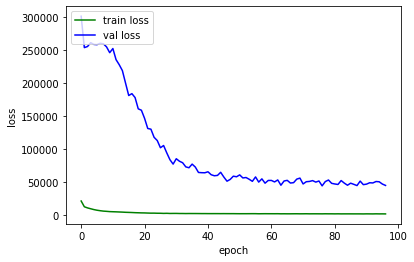

RMSE:  94.8
R-Square:  0.49


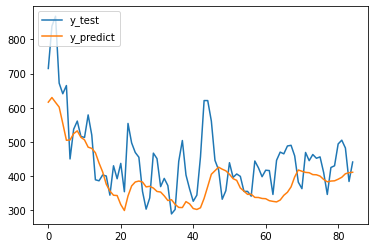

    y_test   y_predict
0      715  616.354309
1      839  629.908875
2      868  615.626526
3      672  601.877441
4      641  554.054993
..     ...         ...
80     494  390.645447
81     505  396.339630
82     482  406.679565
83     384  409.709106
84     441  411.008881

[85 rows x 2 columns]


In [201]:
# 학습 시각화 함수
def learning_graph(hist):
    fig, loss_ax = plt.subplots()
    loss_ax.plot(hist.history['loss'],'g', label='train loss')
    loss_ax.plot(hist.history['val_loss'],'b', label='val loss')
    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    loss_ax.legend(loc='upper left')
    plt.show()
    
learning_graph(hist)

# 실제값, 예측값 그래프
y_predict = model.predict([covid_test_x, news_test_x, search_test_x, people_test_x]) ####

# 에러율 - Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_predict, covid_test_y))
print('RMSE: ',rmse.round(2))

r = explained_variance_score(covid_test_y, y_predict)
print('R-Square: ',r.round(2))

fig, loss_ax = plt.subplots()
loss_ax.plot(covid_test_y, label='y_test')
loss_ax.plot(y_predict, label='y_predict')
loss_ax.legend(loc='upper left')
plt.show()

df = pd.DataFrame(covid_test_y)
df.insert(1,'y_predict',y_predict)
df.rename(columns={0:'y_test'}, inplace=True)
print(df)

# 반복문으로 1~7까지 반복

In [14]:
lag = 1
news_data = news['뉴스 수'].values
search_data = search_covid19['5인이상'].values
covid19_data = covid19.values
people_data = local_people_df['인구이동'].values
rmse =[]
r2 = []

for timestep in range(7, 15, 1): 
    news_x, news_y = split_data(news_data, timestep)

    news_train_x, news_val_x, news_test_x, news_train_y, news_val_y, news_test_y = split(news_x, news_y)
    #----------------------------------------------------------
    search_x, search_y = split_data(search_data, timestep)
    ## LSTM 경우 ###
    # reshape from [samples, timesteps] into [samples, timesteps, features]
    search_features = 1
    search_x = search_x.reshape((search_x.shape[0], search_x.shape[1], search_features))
    print('네이버 검색어 후 : ', search_x.shape)
    search_train_x, search_val_x, search_test_x, search_train_y, search_val_y, search_test_y = split(search_x, search_y)
    #-----------------------------------------------------------
    covid_x, covid_y = split_mult_data(covid19_data, timestep, lag)

    covid_train_x, covid_val_x, covid_test_x, covid_train_y, covid_val_y, covid_test_y = split(covid_x, covid_y)
    #--------------------------------------------------------------
    people_x, people_y = split_data(people_data, timestep)

    people_train_x, people_val_x, people_test_x, people_train_y, people_val_y, people_test_y = split(people_x, people_y)
    
    # 정규화
    n_covid_train_x = covid_train_x.reshape(covid_train_x.shape[0], covid_train_x.shape[1]*covid_train_x.shape[2])
    n_covid_val_x = covid_val_x.reshape(covid_val_x.shape[0], covid_train_x.shape[1]*covid_val_x.shape[2])
    n_covid_test_x = covid_test_x.reshape(covid_test_x.shape[0], covid_train_x.shape[1]*covid_test_x.shape[2])

    # 데이터 정규화
    covid_train_x, covid_val_x, covid_test_x = normalization(n_covid_train_x, n_covid_val_x, n_covid_test_x)
    news_train_x, news_val_x, news_test_x = normalization(news_train_x, news_val_x, news_test_x)
    people_train_x, people_val_x, people_test_x = normalization(people_train_x, people_val_x, people_test_x)

    print('코로나 데이터 형태 : ' ,covid_train_x.shape)
    print('뉴스 데이터 형태 : ' ,news_train_x.shape)
    print('검색어 데이터 형태 : ' ,search_train_x.shape)
    print('인구 이동 데이터 형태 : ' ,people_train_x.shape)
    
    ## LSTM = 1d CNN ###
    # 형태 복원(LSTM에 맞게) - 코로나 데이터
    covid_train_x = covid_train_x.reshape(covid_train_x.shape[0], covid_x.shape[1], covid_x.shape[2])
    covid_val_x = covid_val_x.reshape(covid_val_x.shape[0], covid_x.shape[1], covid_x.shape[2])
    covid_test_x = covid_test_x.reshape(covid_test_x.shape[0], covid_x.shape[1], covid_x.shape[2])

    print('코로나 데이터 형태 변환한거 원상복귀 : ', covid_train_x.shape)

    # 형태 변형시켜줌(1d CNN에 맞게) - 뉴스 데이터
    news_features = 1
    news_train_x = news_train_x.reshape((news_train_x.shape[0], news_train_x.shape[1], news_features))
    news_val_x = news_val_x.reshape((news_val_x.shape[0], news_val_x.shape[1], news_features))
    news_test_x = news_test_x.reshape((news_test_x.shape[0], news_test_x.shape[1], news_features))

    print('뉴스 데이터 형태 변환 : ' ,news_train_x.shape)

    # 형태 변형시켜줌(1d CNN에 맞게) - 인구 데이터
    people_features = 1
    people_train_x = people_train_x.reshape((people_train_x.shape[0], people_train_x.shape[1], people_features))
    people_val_x = people_val_x.reshape((people_val_x.shape[0], people_val_x.shape[1], people_features))
    people_test_x = people_test_x.reshape((people_test_x.shape[0], people_test_x.shape[1], people_features))

    print('인구 데이터 형태 변환 : ', people_train_x.shape)

    tf.random.set_seed(555)

    # Input
    input_covid = Input(shape=(covid_train_x.shape[1],covid_train_x.shape[2]), dtype='float32') # 코로나
    hidden1_covid = layers.Conv1D(16, kernel_size=1, activation='relu')(input_covid)
    hidden2_covid = layers.Conv1D(8, kernel_size=1, activation='relu')(hidden1_covid)
    hidden3_covid = layers.Flatten()(hidden2_covid)

    input_news = Input(shape=(news_train_x.shape[1],news_train_x.shape[2]), dtype='float32')
    hidden1_news = layers.Conv1D(16, kernel_size=1, activation='relu')(input_news)
    hidden2_news = layers.Conv1D(8, kernel_size=1, activation='relu')(hidden1_news)
    hidden3_news = layers.Flatten()(hidden2_news)

    input_search = Input(shape=(search_train_x.shape[1],search_train_x.shape[2]), dtype='float32')
    hidden1_search = layers.Conv1D(16, kernel_size=1, activation='relu')(input_search)
    hidden2_search = layers.Conv1D(8, kernel_size=1, activation='relu')(hidden1_search)
    hidden3_search = layers.Flatten()(hidden2_search)

    input_people = Input(shape=(people_train_x.shape[1],people_train_x.shape[2]), dtype='float32')
    hidden1_people = layers.Conv1D(16, kernel_size=1, activation='relu')(input_people)
    hidden2_people = layers.Conv1D(8, kernel_size=1, activation='relu')(hidden1_people)
    hidden3_people = layers.Flatten()(hidden2_people)

    # 연결
    concatenated = layers.concatenate([hidden3_covid, hidden3_news, hidden3_search, hidden3_people]) ####
    # Output
    result = layers.Dense(lag)(concatenated)

    model = Model([ input_covid, input_news, input_search, input_people], result) ####
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    callback_list = [
      keras.callbacks.EarlyStopping(
        monitor='val_loss', # 모델의 검증 정확도 모니터링
        patience=20, # 1 에포크보다 더 길게 향상되지 않으면 중단
      )
    ]
    # batch_size : batch_size만큼 보고 가중치를 업데이트 주겠다
    hist = model.fit([covid_train_x, news_train_x, search_train_x, people_train_x], covid_train_y, epochs=1000, batch_size=5, 
                     callbacks=callback_list, validation_data=([covid_val_x, news_val_x, search_val_x, people_val_x], covid_val_y)) ####
    
    y_predict = model.predict([covid_test_x, news_test_x, search_test_x, people_test_x]) ####
    
    # 에러율 - Root Mean Squared Error
    Rmse = round(math.sqrt(mean_squared_error(y_predict, covid_test_y)), 2)
    R2 = round(explained_variance_score(covid_test_y, y_predict), 2)

    rmse.append(Rmse)
    r2.append(R2)

네이버 검색어 후 :  (434, 1, 1)
코로나 데이터 형태 :  (260, 2)
뉴스 데이터 형태 :  (260, 1)
검색어 데이터 형태 :  (260, 1, 1)
인구 이동 데이터 형태 :  (260, 1)
코로나 데이터 형태 변환한거 원상복귀 :  (260, 1, 2)
뉴스 데이터 형태 변환 :  (260, 1, 1)
인구 데이터 형태 변환 :  (260, 1, 1)
Epoch 1/1000
52/52 [==============================] - 0s 8ms/step - loss: 25403.1230 - mae: 93.0842 - val_loss: 325606.4375 - val_mae: 436.8253
Epoch 2/1000
52/52 [==============================] - 0s 3ms/step - loss: 25194.1816 - mae: 92.2068 - val_loss: 322143.6875 - val_mae: 434.3380
Epoch 3/1000
52/52 [==============================] - 0s 3ms/step - loss: 24836.3145 - mae: 90.6369 - val_loss: 316287.9375 - val_mae: 429.9561
Epoch 4/1000
52/52 [==============================] - 0s 3ms/step - loss: 24178.3457 - mae: 88.1579 - val_loss: 306792.4688 - val_mae: 422.5563
Epoch 5/1000
52/52 [==============================] - 0s 3ms/step - loss: 23100.9160 - mae: 83.8665 - val_loss: 292898.3125 - val_mae: 411.0269
Epoch 6/1000
52/52 [==============================] - 0s 3ms/step -

52/52 [==============================] - 0s 3ms/step - loss: 2818.0391 - mae: 28.1384 - val_loss: 11485.7051 - val_mae: 74.2547
Epoch 114/1000
52/52 [==============================] - 0s 3ms/step - loss: 2820.3816 - mae: 27.7246 - val_loss: 11275.9111 - val_mae: 73.5024
Epoch 115/1000
52/52 [==============================] - 0s 3ms/step - loss: 2833.3501 - mae: 27.7037 - val_loss: 11338.3027 - val_mae: 73.7453
Epoch 116/1000
52/52 [==============================] - 0s 3ms/step - loss: 2813.7253 - mae: 27.9964 - val_loss: 11076.0518 - val_mae: 72.7537
Epoch 117/1000
52/52 [==============================] - 0s 3ms/step - loss: 2821.1021 - mae: 28.1533 - val_loss: 11092.9756 - val_mae: 72.8716
Epoch 118/1000
52/52 [==============================] - 0s 3ms/step - loss: 2815.8289 - mae: 27.8414 - val_loss: 11016.1465 - val_mae: 72.6505
Epoch 119/1000
52/52 [==============================] - 0s 3ms/step - loss: 2809.6724 - mae: 28.0773 - val_loss: 10802.1621 - val_mae: 71.8204
Epoch 120/1000

52/52 [==============================] - 0s 4ms/step - loss: 7724.4639 - mae: 57.4018 - val_loss: 72684.5000 - val_mae: 183.4288
Epoch 48/1000
52/52 [==============================] - 0s 4ms/step - loss: 7437.0518 - mae: 56.3829 - val_loss: 69125.1094 - val_mae: 178.8442
Epoch 49/1000
52/52 [==============================] - 0s 4ms/step - loss: 7135.0591 - mae: 54.8297 - val_loss: 67457.7266 - val_mae: 176.9045
Epoch 50/1000
52/52 [==============================] - 0s 4ms/step - loss: 6845.7090 - mae: 54.4032 - val_loss: 63375.7461 - val_mae: 171.3941
Epoch 51/1000
52/52 [==============================] - 0s 4ms/step - loss: 6556.1660 - mae: 52.8337 - val_loss: 60604.4023 - val_mae: 167.6381
Epoch 52/1000
52/52 [==============================] - 0s 4ms/step - loss: 6293.1440 - mae: 50.6438 - val_loss: 58302.8320 - val_mae: 164.5374
Epoch 53/1000
52/52 [==============================] - 0s 4ms/step - loss: 6001.9023 - mae: 50.3429 - val_loss: 55257.0039 - val_mae: 160.1968
Epoch 54/1000

52/52 [==============================] - 0s 4ms/step - loss: 11916.3691 - mae: 70.3275 - val_loss: 108177.3359 - val_mae: 229.7501
Epoch 27/1000
52/52 [==============================] - 0s 4ms/step - loss: 11544.9199 - mae: 69.4049 - val_loss: 103352.6172 - val_mae: 224.3501
Epoch 28/1000
52/52 [==============================] - 0s 4ms/step - loss: 11130.1797 - mae: 67.8050 - val_loss: 97505.0078 - val_mae: 217.4469
Epoch 29/1000
52/52 [==============================] - 0s 4ms/step - loss: 10692.8408 - mae: 65.7931 - val_loss: 95790.9922 - val_mae: 215.5166
Epoch 30/1000
52/52 [==============================] - 0s 4ms/step - loss: 10294.0391 - mae: 65.7523 - val_loss: 89243.3281 - val_mae: 206.5623
Epoch 31/1000
52/52 [==============================] - 0s 4ms/step - loss: 9797.5654 - mae: 62.4597 - val_loss: 86247.2266 - val_mae: 202.8940
Epoch 32/1000
52/52 [==============================] - 0s 4ms/step - loss: 9329.6885 - mae: 61.8866 - val_loss: 81178.0781 - val_mae: 195.9285
Epoch 

Epoch 36/1000
52/52 [==============================] - 0s 4ms/step - loss: 6326.3643 - mae: 49.7234 - val_loss: 56964.6328 - val_mae: 168.0043
Epoch 37/1000
52/52 [==============================] - 0s 4ms/step - loss: 5999.8892 - mae: 48.2460 - val_loss: 53830.5000 - val_mae: 163.2563
Epoch 38/1000
52/52 [==============================] - 0s 4ms/step - loss: 5701.2559 - mae: 46.1755 - val_loss: 51068.1055 - val_mae: 158.8693
Epoch 39/1000
52/52 [==============================] - 0s 4ms/step - loss: 5414.4961 - mae: 45.8739 - val_loss: 48474.7539 - val_mae: 154.0871
Epoch 40/1000
52/52 [==============================] - 0s 4ms/step - loss: 5177.6211 - mae: 43.3289 - val_loss: 46925.0312 - val_mae: 151.7694
Epoch 41/1000
52/52 [==============================] - 0s 4ms/step - loss: 4938.0596 - mae: 42.9899 - val_loss: 43968.8789 - val_mae: 145.6320
Epoch 42/1000
52/52 [==============================] - 0s 4ms/step - loss: 4762.0674 - mae: 40.9974 - val_loss: 42267.6406 - val_mae: 142.1085

Epoch 45/1000
52/52 [==============================] - 0s 4ms/step - loss: 4389.2939 - mae: 36.6853 - val_loss: 35433.4023 - val_mae: 123.8507
Epoch 46/1000
52/52 [==============================] - 0s 3ms/step - loss: 4360.1084 - mae: 36.6758 - val_loss: 33368.7891 - val_mae: 119.7160
Epoch 47/1000
52/52 [==============================] - 0s 4ms/step - loss: 4298.5830 - mae: 35.6521 - val_loss: 31917.1270 - val_mae: 118.4848
Epoch 48/1000
52/52 [==============================] - 0s 4ms/step - loss: 4280.3594 - mae: 35.1548 - val_loss: 30486.4336 - val_mae: 116.1133
Epoch 49/1000
52/52 [==============================] - 0s 4ms/step - loss: 4227.0132 - mae: 34.4440 - val_loss: 29247.4395 - val_mae: 112.9632
Epoch 50/1000
52/52 [==============================] - 0s 3ms/step - loss: 4200.2534 - mae: 34.8298 - val_loss: 27777.6484 - val_mae: 110.5893
Epoch 51/1000
52/52 [==============================] - 0s 3ms/step - loss: 4153.8799 - mae: 34.6661 - val_loss: 26605.0957 - val_mae: 108.7224

네이버 검색어 후 :  (429, 6, 1)
코로나 데이터 형태 :  (257, 12)
뉴스 데이터 형태 :  (257, 6)
검색어 데이터 형태 :  (257, 6, 1)
인구 이동 데이터 형태 :  (257, 6)
코로나 데이터 형태 변환한거 원상복귀 :  (257, 6, 2)
뉴스 데이터 형태 변환 :  (257, 6, 1)
인구 데이터 형태 변환 :  (257, 6, 1)
Epoch 1/1000
52/52 [==============================] - 0s 9ms/step - loss: 25657.7031 - mae: 94.3357 - val_loss: 331338.8125 - val_mae: 445.9391
Epoch 2/1000
52/52 [==============================] - 0s 4ms/step - loss: 24990.6953 - mae: 91.4620 - val_loss: 318721.5625 - val_mae: 436.3835
Epoch 3/1000
52/52 [==============================] - 0s 3ms/step - loss: 23464.2773 - mae: 85.2472 - val_loss: 295120.5938 - val_mae: 417.2019
Epoch 4/1000
52/52 [==============================] - 0s 4ms/step - loss: 20959.2773 - mae: 76.5346 - val_loss: 260136.9531 - val_mae: 386.2120
Epoch 5/1000
52/52 [==============================] - 0s 4ms/step - loss: 18152.5703 - mae: 70.2353 - val_loss: 220350.8125 - val_mae: 348.0869
Epoch 6/1000
52/52 [==============================] - 0s 4ms/step 

Epoch 114/1000
52/52 [==============================] - 0s 3ms/step - loss: 3519.3838 - mae: 30.3939 - val_loss: 19101.2109 - val_mae: 96.5701
Epoch 115/1000
52/52 [==============================] - 0s 3ms/step - loss: 3501.0615 - mae: 31.0219 - val_loss: 18529.0469 - val_mae: 95.0035
Epoch 116/1000
52/52 [==============================] - 0s 3ms/step - loss: 3470.2446 - mae: 30.4213 - val_loss: 19435.3320 - val_mae: 97.6013
Epoch 117/1000
52/52 [==============================] - 0s 3ms/step - loss: 3465.2314 - mae: 30.8274 - val_loss: 20003.3379 - val_mae: 99.0730
Epoch 118/1000
52/52 [==============================] - 0s 3ms/step - loss: 3436.1855 - mae: 29.9132 - val_loss: 19570.4297 - val_mae: 98.0392
Epoch 119/1000
52/52 [==============================] - 0s 3ms/step - loss: 3433.6599 - mae: 30.8759 - val_loss: 20281.8164 - val_mae: 99.8091
Epoch 120/1000
52/52 [==============================] - 0s 3ms/step - loss: 3433.6326 - mae: 29.8074 - val_loss: 20293.5605 - val_mae: 99.8027

52/52 [==============================] - 0s 4ms/step - loss: 3918.9219 - mae: 32.8567 - val_loss: 24795.6309 - val_mae: 110.4019
Epoch 95/1000
52/52 [==============================] - 0s 3ms/step - loss: 3918.9905 - mae: 34.0916 - val_loss: 24467.0352 - val_mae: 109.4987
Epoch 96/1000
52/52 [==============================] - 0s 3ms/step - loss: 3889.7314 - mae: 32.4590 - val_loss: 25194.4883 - val_mae: 111.3809
Epoch 97/1000
52/52 [==============================] - 0s 3ms/step - loss: 3875.8198 - mae: 32.7540 - val_loss: 25801.6738 - val_mae: 112.8507
Epoch 98/1000
52/52 [==============================] - 0s 3ms/step - loss: 3825.2810 - mae: 32.4297 - val_loss: 25128.0059 - val_mae: 111.3971
Epoch 99/1000
52/52 [==============================] - 0s 3ms/step - loss: 3807.0332 - mae: 33.0401 - val_loss: 24943.7852 - val_mae: 111.0644
Epoch 100/1000
52/52 [==============================] - ETA: 0s - loss: 4415.8887 - mae: 34.018 - 0s 3ms/step - loss: 3784.0198 - mae: 32.5970 - val_loss: 2

In [15]:
rmse

[93.97, 100.76, 92.72, 92.36, 97.65, 94.47, 106.49]

In [16]:
r2

[0.56, 0.58, 0.58, 0.6, 0.6, 0.62, 0.6]

Text(0, 0.5, 'RMSE')

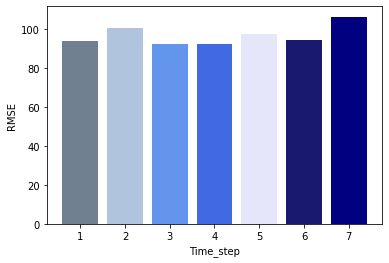

In [17]:
colors = ['slategrey', 'lightsteelblue', 'cornflowerblue', 'royalblue', 'lavender', 'midnightblue','navy']

plt.bar([1,2,3,4,5,6,7],rmse, color = colors)
plt.xlabel("Time_step")
plt.ylabel("RMSE")

Text(0, 0.5, 'R2')

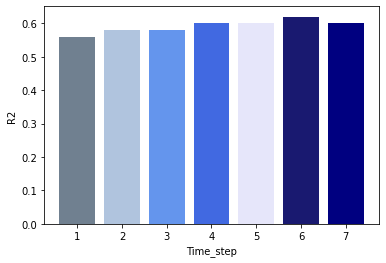

In [18]:
plt.bar([1,2,3,4,5,6,7],r2, color = colors)
plt.xlabel("Time_step")
plt.ylabel("R2")

# 실험

In [25]:
import numpy as np 
import pandas as pd
import seaborn as sns 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

covid = pd.read_csv("covid19.csv")
covid = covid.drop('Unnamed: 0', axis=1)
covid = covid.drop('date', axis=1)
covid = covid[{'acc_decide', 'acc_recovered', 'acc_death',
       'recovered_per_day', 'death_per_day', 'decide_per_day'}]

covid

,death_per_day,acc_recovered,acc_decide,recovered_per_day,acc_death,decide_per_day
0,0,0,1,0,0,1
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,2,0,0,1
...,...,...,...,...,...,...
430,7,92630,100770,562,1716,494
431,5,93475,101275,845,1721,505
432,1,93855,101757,420,1722,482
433,4,94124,102141,269,1726,384


In [26]:
covid1 = covid.values

for timestep in range(1, 1, 1): 
    covid_x, covid_y = split_mult_data(covid1, timestep, 1)

    x_train, x_test, y_train, y_test = train_test_split(
        covid_x,
        covid_y,
        test_size=0.2,
        random_state=123,
    )

In [29]:
covid_x.shape, covid_y.shape

((434, 1, 6), (434, 1))

# 데이터 하나

In [18]:
# 코로나 데이터
covid19 = pd.read_csv("covid19.csv",  header=0, squeeze=True)
covid19 = covid19['decide_per_day']
covid19

0        1
1        0
2        0
3        0
4        1
      ... 
488    585
489    538
490    516
491    699
492    629
Name: decide_per_day, Length: 493, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split

lag = 1
rmse =[]
r2 = []

for timestep in range(7, 15, 1): 
    
    covid_x, covid_y = split_data(covid19.values, timestep)

    covid_train_x, covid_test_x, covid_train_y, covid_test_y = train_test_split(
        covid_x,
        covid_y,
        test_size=0.2,
        shuffle= False
        )

    # 형태 변형 - 코로나 데이터
    covid_train_x = covid_train_x.reshape(covid_train_x.shape[0], covid_x.shape[1])
    covid_test_x = covid_test_x.reshape(covid_test_x.shape[0], covid_x.shape[1])

    covid_train_x, covid_test_x = normalization2(covid_train_x, covid_test_x)
    
    print('코로나 데이터 형태 : ' ,covid_train_x.shape)

    tf.random.set_seed(555)

    # Input
    input_covid = Input(shape=(covid_train_x.shape[1],), dtype='float32') # 코로나
    hidden1_covid = layers.Dense(32, activation='relu')(input_covid)
    hidden2_covid = layers.Dense(16, activation='relu')(hidden1_covid)
    hidden3_covid = layers.Dense(8, activation='relu')(hidden2_covid)
    # Output
    result = layers.Dense(lag)(hidden3_covid)
    
    model = Model(input_covid, result)
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    callback_list = [
      keras.callbacks.EarlyStopping(
        monitor='val_loss', # 모델의 검증 정확도 모니터링
        patience=20, # 1 에포크보다 더 길게 향상되지 않으면 중단
      )
    ]
    # batch_size : batch_size만큼 보고 가중치를 업데이트 주겠다
    hist = model.fit(covid_train_x, covid_train_y, 
                     epochs=1000, batch_size=5, 
                     callbacks=callback_list, validation_data=(covid_test_x, covid_test_y)) ####
    
    y_predict = model.predict(covid_test_x) ####
    
    # 에러율 - Root Mean Squared Error
    Rmse = round(math.sqrt(mean_squared_error(y_predict, covid_test_y)), 2)
    R2 = round(explained_variance_score(covid_test_y, y_predict), 2)

    rmse.append(Rmse)
    r2.append(R2)

코로나 데이터 형태 :  (388, 7)
Epoch 1/1000
78/78 [==============================] - 0s 4ms/step - loss: 122907.0703 - mae: 220.4389 - val_loss: 303411.6562 - val_mae: 537.7590
Epoch 2/1000
78/78 [==============================] - 0s 2ms/step - loss: 122212.3281 - mae: 219.4758 - val_loss: 298465.1562 - val_mae: 533.2382
Epoch 3/1000
78/78 [==============================] - 0s 2ms/step - loss: 115848.0078 - mae: 211.3107 - val_loss: 264320.1562 - val_mae: 500.9521
Epoch 4/1000
78/78 [==============================] - 0s 2ms/step - loss: 91528.8281 - mae: 179.8901 - val_loss: 169883.7031 - val_mae: 398.3704
Epoch 5/1000
78/78 [==============================] - 0s 2ms/step - loss: 49618.0586 - mae: 133.6806 - val_loss: 55213.7148 - val_mae: 216.9157
Epoch 6/1000
78/78 [==============================] - 0s 2ms/step - loss: 21750.2344 - mae: 111.6509 - val_loss: 12728.4072 - val_mae: 90.1872
Epoch 7/1000
78/78 [==============================] - 0s 2ms/step - loss: 15878.3271 - mae: 104.4732 - val_

78/78 [==============================] - 0s 2ms/step - loss: 8012.3394 - mae: 55.3196 - val_loss: 5710.4111 - val_mae: 61.1226
Epoch 18/1000
78/78 [==============================] - 0s 2ms/step - loss: 7906.1094 - mae: 54.5102 - val_loss: 5486.9175 - val_mae: 59.9858
Epoch 19/1000
78/78 [==============================] - 0s 2ms/step - loss: 7879.1528 - mae: 54.1217 - val_loss: 5620.7734 - val_mae: 60.7729
Epoch 20/1000
78/78 [==============================] - 0s 2ms/step - loss: 7824.5703 - mae: 53.4078 - val_loss: 5738.1104 - val_mae: 61.2846
Epoch 21/1000
78/78 [==============================] - 0s 2ms/step - loss: 7753.2114 - mae: 53.0849 - val_loss: 5665.7319 - val_mae: 60.9537
Epoch 22/1000
78/78 [==============================] - 0s 2ms/step - loss: 7653.5430 - mae: 52.3952 - val_loss: 5483.0625 - val_mae: 59.8805
Epoch 23/1000
78/78 [==============================] - 0s 2ms/step - loss: 7564.8145 - mae: 52.3111 - val_loss: 5510.2031 - val_mae: 60.0939
Epoch 24/1000
78/78 [======

Epoch 40/1000
78/78 [==============================] - 0s 2ms/step - loss: 6262.7983 - mae: 47.3906 - val_loss: 5851.3989 - val_mae: 61.4187
Epoch 41/1000
78/78 [==============================] - 0s 2ms/step - loss: 6102.6318 - mae: 46.6806 - val_loss: 6036.1626 - val_mae: 62.7984
Epoch 42/1000
78/78 [==============================] - 0s 2ms/step - loss: 6063.8354 - mae: 46.7656 - val_loss: 6229.2837 - val_mae: 63.6605
Epoch 43/1000
78/78 [==============================] - 0s 2ms/step - loss: 5981.1021 - mae: 46.1509 - val_loss: 5941.3145 - val_mae: 62.1631
Epoch 44/1000
78/78 [==============================] - 0s 2ms/step - loss: 5914.3647 - mae: 45.7971 - val_loss: 6276.2559 - val_mae: 63.7964
코로나 데이터 형태 :  (386, 10)
Epoch 1/1000
78/78 [==============================] - 0s 3ms/step - loss: 124364.0234 - mae: 223.0409 - val_loss: 303293.1562 - val_mae: 537.5194
Epoch 2/1000
78/78 [==============================] - 0s 2ms/step - loss: 123545.1016 - mae: 222.0237 - val_loss: 297826.4062

Epoch 52/1000
78/78 [==============================] - 0s 2ms/step - loss: 5190.5239 - mae: 42.3589 - val_loss: 5876.7153 - val_mae: 60.0321
Epoch 53/1000
78/78 [==============================] - 0s 3ms/step - loss: 5113.4712 - mae: 42.2057 - val_loss: 5950.9170 - val_mae: 60.7921
코로나 데이터 형태 :  (385, 11)
Epoch 1/1000
77/77 [==============================] - 0s 3ms/step - loss: 124697.5078 - mae: 223.6242 - val_loss: 303373.0625 - val_mae: 537.5908
Epoch 2/1000
77/77 [==============================] - 0s 2ms/step - loss: 123870.2109 - mae: 222.6328 - val_loss: 297659.9375 - val_mae: 532.3699
Epoch 3/1000
77/77 [==============================] - 0s 2ms/step - loss: 116180.6406 - mae: 212.8333 - val_loss: 254382.5156 - val_mae: 491.0634
Epoch 4/1000
77/77 [==============================] - 0s 2ms/step - loss: 82803.0625 - mae: 174.1185 - val_loss: 128294.8594 - val_mae: 343.6313
Epoch 5/1000
77/77 [==============================] - 0s 2ms/step - loss: 35978.4805 - mae: 119.1915 - val_loss

Epoch 57/1000
77/77 [==============================] - 0s 2ms/step - loss: 5130.5063 - mae: 42.5315 - val_loss: 6031.3232 - val_mae: 60.6480
Epoch 58/1000
77/77 [==============================] - 0s 2ms/step - loss: 5073.1558 - mae: 42.3503 - val_loss: 6289.7139 - val_mae: 62.6353
Epoch 59/1000
77/77 [==============================] - 0s 2ms/step - loss: 5104.2969 - mae: 42.3679 - val_loss: 5873.4766 - val_mae: 59.2958
Epoch 60/1000
77/77 [==============================] - 0s 2ms/step - loss: 5051.8281 - mae: 42.1867 - val_loss: 5879.9048 - val_mae: 59.1642
코로나 데이터 형태 :  (384, 12)
Epoch 1/1000
77/77 [==============================] - 0s 4ms/step - loss: 125004.4375 - mae: 224.1670 - val_loss: 303170.0625 - val_mae: 537.4066
Epoch 2/1000
77/77 [==============================] - 0s 2ms/step - loss: 124169.7422 - mae: 223.1632 - val_loss: 297891.1875 - val_mae: 532.5833
Epoch 3/1000
77/77 [==============================] - 0s 2ms/step - loss: 117475.9141 - mae: 214.8282 - val_loss: 259421

Epoch 55/1000
77/77 [==============================] - 0s 2ms/step - loss: 5184.5591 - mae: 42.9078 - val_loss: 5708.2622 - val_mae: 58.4205
코로나 데이터 형태 :  (384, 13)
Epoch 1/1000
77/77 [==============================] - 0s 3ms/step - loss: 125541.2188 - mae: 225.3447 - val_loss: 304401.9062 - val_mae: 538.4915
Epoch 2/1000
77/77 [==============================] - 0s 2ms/step - loss: 124744.7422 - mae: 224.4017 - val_loss: 299118.4062 - val_mae: 533.6768
Epoch 3/1000
77/77 [==============================] - 0s 2ms/step - loss: 117614.7500 - mae: 215.7252 - val_loss: 257180.8281 - val_mae: 493.8274
Epoch 4/1000
77/77 [==============================] - 0s 2ms/step - loss: 85300.0781 - mae: 175.3845 - val_loss: 126653.8438 - val_mae: 341.3538
Epoch 5/1000
77/77 [==============================] - 0s 2ms/step - loss: 35500.2383 - mae: 114.5410 - val_loss: 21324.0723 - val_mae: 121.5341
Epoch 6/1000
77/77 [==============================] - 0s 2ms/step - loss: 17603.0840 - mae: 100.8633 - val_l

Epoch 58/1000
77/77 [==============================] - 0s 2ms/step - loss: 5322.1953 - mae: 43.5950 - val_loss: 5623.4478 - val_mae: 57.8039
Epoch 59/1000
77/77 [==============================] - 0s 2ms/step - loss: 5359.4028 - mae: 44.0050 - val_loss: 5652.4419 - val_mae: 57.9893
Epoch 60/1000
77/77 [==============================] - 0s 2ms/step - loss: 5286.7378 - mae: 44.0994 - val_loss: 6938.3594 - val_mae: 66.4124
Epoch 61/1000
77/77 [==============================] - 0s 2ms/step - loss: 5352.5522 - mae: 43.2869 - val_loss: 6068.8491 - val_mae: 60.8068
Epoch 62/1000
77/77 [==============================] - 0s 3ms/step - loss: 5254.0933 - mae: 43.2165 - val_loss: 5572.3418 - val_mae: 57.4312
Epoch 63/1000
77/77 [==============================] - 0s 2ms/step - loss: 5269.3179 - mae: 43.6115 - val_loss: 5644.9946 - val_mae: 58.0737
Epoch 64/1000
77/77 [==============================] - 0s 3ms/step - loss: 5292.6509 - mae: 43.2028 - val_loss: 5894.5015 - val_mae: 59.6115
Epoch 65/1000

Epoch 116/1000
77/77 [==============================] - 0s 2ms/step - loss: 4930.0649 - mae: 41.6099 - val_loss: 5328.3828 - val_mae: 56.4460
Epoch 117/1000
77/77 [==============================] - 0s 2ms/step - loss: 4778.4805 - mae: 40.9933 - val_loss: 5678.6724 - val_mae: 58.9614
Epoch 118/1000
77/77 [==============================] - 0s 2ms/step - loss: 4776.6665 - mae: 40.7924 - val_loss: 5606.8091 - val_mae: 58.4519
Epoch 119/1000
77/77 [==============================] - 0s 2ms/step - loss: 4706.9556 - mae: 40.8847 - val_loss: 5245.2891 - val_mae: 55.9038
Epoch 120/1000
77/77 [==============================] - 0s 2ms/step - loss: 4783.2280 - mae: 40.8293 - val_loss: 5373.8188 - val_mae: 56.7939
Epoch 121/1000
77/77 [==============================] - 0s 2ms/step - loss: 4659.2280 - mae: 40.5805 - val_loss: 5199.0078 - val_mae: 55.4883
Epoch 122/1000
77/77 [==============================] - 0s 2ms/step - loss: 4720.9937 - mae: 41.0129 - val_loss: 5324.3574 - val_mae: 56.4852
Epoch 

Epoch 174/1000
77/77 [==============================] - 0s 2ms/step - loss: 4561.2007 - mae: 39.8494 - val_loss: 5021.7554 - val_mae: 54.7308
Epoch 175/1000
77/77 [==============================] - 0s 2ms/step - loss: 4576.6455 - mae: 40.3135 - val_loss: 5832.4995 - val_mae: 59.9369
Epoch 176/1000
77/77 [==============================] - 0s 2ms/step - loss: 4588.9731 - mae: 39.5505 - val_loss: 5025.9551 - val_mae: 54.7038
Epoch 177/1000
77/77 [==============================] - 0s 2ms/step - loss: 4597.1440 - mae: 40.5370 - val_loss: 5696.9585 - val_mae: 58.9715
Epoch 178/1000
77/77 [==============================] - 0s 2ms/step - loss: 4569.1606 - mae: 39.5993 - val_loss: 5009.6479 - val_mae: 54.6762
Epoch 179/1000
77/77 [==============================] - 0s 2ms/step - loss: 4559.7246 - mae: 39.9523 - val_loss: 5249.9326 - val_mae: 56.0007
Epoch 180/1000
77/77 [==============================] - 0s 2ms/step - loss: 4422.4624 - mae: 39.7443 - val_loss: 5678.6719 - val_mae: 58.8398
Epoch 

Epoch 232/1000
77/77 [==============================] - 0s 2ms/step - loss: 4337.6479 - mae: 38.8297 - val_loss: 5402.3892 - val_mae: 56.8574
Epoch 233/1000
77/77 [==============================] - 0s 2ms/step - loss: 4396.5894 - mae: 39.2628 - val_loss: 4933.8037 - val_mae: 54.4735
Epoch 234/1000
77/77 [==============================] - 0s 2ms/step - loss: 4504.4160 - mae: 39.9642 - val_loss: 4967.6987 - val_mae: 55.1987
Epoch 235/1000
77/77 [==============================] - 0s 2ms/step - loss: 4365.7319 - mae: 39.3128 - val_loss: 5719.2090 - val_mae: 58.7799
Epoch 236/1000
77/77 [==============================] - 0s 2ms/step - loss: 4334.2349 - mae: 38.7619 - val_loss: 4949.5767 - val_mae: 55.0056
Epoch 237/1000
77/77 [==============================] - 0s 2ms/step - loss: 4351.7651 - mae: 38.9354 - val_loss: 5267.6489 - val_mae: 55.9936
Epoch 238/1000
77/77 [==============================] - 0s 2ms/step - loss: 4375.3677 - mae: 38.5357 - val_loss: 4920.2104 - val_mae: 54.3309
Epoch 

Epoch 290/1000
77/77 [==============================] - 0s 2ms/step - loss: 4330.0962 - mae: 38.8467 - val_loss: 4875.7974 - val_mae: 53.9554
Epoch 291/1000
77/77 [==============================] - 0s 2ms/step - loss: 4329.2578 - mae: 38.4917 - val_loss: 4871.9419 - val_mae: 54.5488
Epoch 292/1000
77/77 [==============================] - 0s 2ms/step - loss: 4307.8179 - mae: 38.8265 - val_loss: 5020.7202 - val_mae: 54.6655
Epoch 293/1000
77/77 [==============================] - 0s 2ms/step - loss: 4331.9526 - mae: 38.5551 - val_loss: 4981.5806 - val_mae: 54.3946
Epoch 294/1000
77/77 [==============================] - 0s 2ms/step - loss: 4281.2100 - mae: 38.4608 - val_loss: 5002.6118 - val_mae: 55.9984
Epoch 295/1000
77/77 [==============================] - 0s 2ms/step - loss: 4450.7212 - mae: 39.2376 - val_loss: 4866.8491 - val_mae: 53.9836
Epoch 296/1000
77/77 [==============================] - 0s 2ms/step - loss: 4320.8296 - mae: 38.4722 - val_loss: 4954.1914 - val_mae: 54.2650
Epoch 

Epoch 348/1000
77/77 [==============================] - 0s 2ms/step - loss: 4427.6074 - mae: 39.2220 - val_loss: 5633.5044 - val_mae: 57.8405
Epoch 349/1000
77/77 [==============================] - 0s 2ms/step - loss: 4288.1206 - mae: 38.9685 - val_loss: 7364.3867 - val_mae: 67.4544
Epoch 350/1000
77/77 [==============================] - 0s 2ms/step - loss: 4512.3667 - mae: 39.2121 - val_loss: 4982.1685 - val_mae: 54.3702
Epoch 351/1000
77/77 [==============================] - 0s 2ms/step - loss: 4244.9160 - mae: 38.3844 - val_loss: 4822.8071 - val_mae: 53.7015
Epoch 352/1000
77/77 [==============================] - 0s 2ms/step - loss: 4258.6426 - mae: 38.0340 - val_loss: 4893.3237 - val_mae: 54.0183
Epoch 353/1000
77/77 [==============================] - 0s 2ms/step - loss: 4270.6187 - mae: 38.4935 - val_loss: 4892.0879 - val_mae: 54.0162
Epoch 354/1000
77/77 [==============================] - 0s 2ms/step - loss: 4267.8491 - mae: 38.5880 - val_loss: 4806.8408 - val_mae: 53.8511
Epoch 

Epoch 406/1000
77/77 [==============================] - 0s 2ms/step - loss: 4252.7275 - mae: 37.8836 - val_loss: 4842.2798 - val_mae: 53.7392
Epoch 407/1000
77/77 [==============================] - 0s 2ms/step - loss: 4165.1274 - mae: 38.2986 - val_loss: 5418.0596 - val_mae: 56.4078
Epoch 408/1000
77/77 [==============================] - 0s 2ms/step - loss: 4384.4663 - mae: 39.0549 - val_loss: 4837.5522 - val_mae: 53.7712
Epoch 409/1000
77/77 [==============================] - 0s 2ms/step - loss: 4231.9565 - mae: 38.0212 - val_loss: 4766.8608 - val_mae: 53.6049
Epoch 410/1000
77/77 [==============================] - 0s 2ms/step - loss: 4170.3271 - mae: 38.2585 - val_loss: 5067.3779 - val_mae: 56.7206
Epoch 411/1000
77/77 [==============================] - 0s 2ms/step - loss: 4291.1782 - mae: 38.0927 - val_loss: 4934.6445 - val_mae: 54.1343
Epoch 412/1000
77/77 [==============================] - 0s 2ms/step - loss: 4199.0708 - mae: 38.1211 - val_loss: 5269.8345 - val_mae: 55.5794
Epoch 

77/77 [==============================] - 0s 2ms/step - loss: 11025.5469 - mae: 67.4278 - val_loss: 6273.7085 - val_mae: 64.7765
Epoch 15/1000
77/77 [==============================] - 0s 2ms/step - loss: 10540.2295 - mae: 64.1733 - val_loss: 6064.2798 - val_mae: 63.6221
Epoch 16/1000
77/77 [==============================] - 0s 2ms/step - loss: 10170.5615 - mae: 63.0732 - val_loss: 6458.3984 - val_mae: 65.6681
Epoch 17/1000
77/77 [==============================] - 0s 2ms/step - loss: 9724.6016 - mae: 61.0150 - val_loss: 6388.3491 - val_mae: 65.2552
Epoch 18/1000
77/77 [==============================] - 0s 2ms/step - loss: 9319.2207 - mae: 58.4192 - val_loss: 6065.6196 - val_mae: 63.5658
Epoch 19/1000
77/77 [==============================] - 0s 2ms/step - loss: 8915.6074 - mae: 57.4006 - val_loss: 5945.3340 - val_mae: 62.9791
Epoch 20/1000
77/77 [==============================] - 0s 2ms/step - loss: 8567.7764 - mae: 56.8223 - val_loss: 7204.8784 - val_mae: 68.4360
Epoch 21/1000
77/77 [===

[76.35, 75.44, 79.22, 77.14, 76.68, 75.55, 70.18, 81.32]


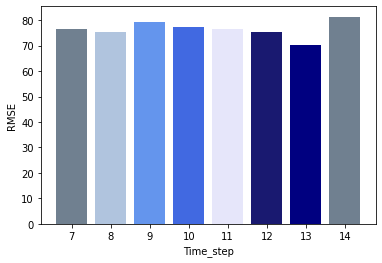

In [21]:
colors = ['slategrey', 'lightsteelblue', 'cornflowerblue', 'royalblue', 'lavender', 'midnightblue','navy']

num = []
for i in range (7, 15, 1):
    num.append(i)

plt.bar(num, rmse, color = colors)
plt.xlabel("Time_step")
plt.ylabel("RMSE")
print(rmse)

[0.6, 0.61, 0.59, 0.59, 0.59, 0.6, 0.67, 0.58]


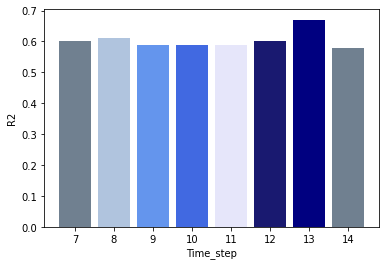

In [22]:
plt.bar(num, r2, color = colors)
plt.xlabel("Time_step")
plt.ylabel("R2")
print(r2)